In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

### Reduzindo o dataset e dividindo X e Y para o modelo

In [54]:
data_full = pd.read_csv('dados.csv', sep=',')
data_full.head()

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,1,0.621951,435,0.621951,29,195.072,100.0,6
1,0,3,1,402,22,1,0.621951,435,0.621951,29,195.072,100.0,6
2,0,2,1,205,6,1,0.621951,435,0.621951,29,195.072,100.0,6
3,1,2,2,453,9,1,0.621951,435,0.621951,29,195.072,100.0,6
4,0,2,2,393,6,1,0.621951,435,0.621951,29,195.072,100.0,6


In [55]:
## versão com 20 mil linhas

data = data_full.sample(n=20000, random_state=23)

In [39]:
X = np.array(data.drop(['MADE'], axis=1))
y = np.array(data['MADE'])

indices = np.random.randint(0, len(X), 20000)

X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.2)

## Árvore de decisão

### Criando a árvore

In [43]:
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, tree.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, tree.predict(X_test))))
print(classification_report(y_test, tree.predict(X_test)))

Ein: 0.0000
Eout: 0.4337
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2135
           1       0.53      0.55      0.54      1865

    accuracy                           0.57      4000
   macro avg       0.57      0.57      0.57      4000
weighted avg       0.57      0.57      0.57      4000



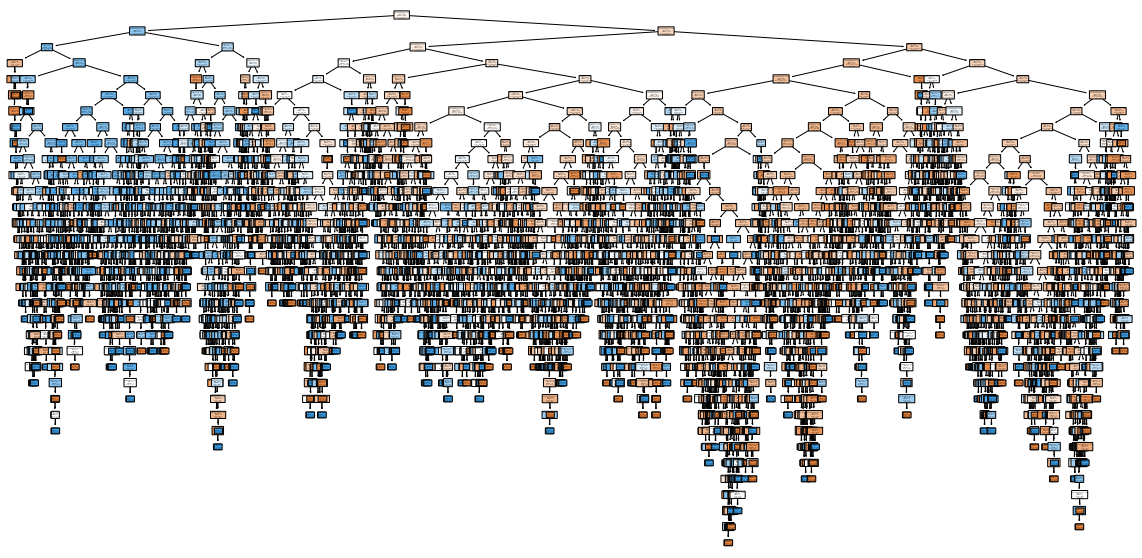

In [44]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, rounded=True, feature_names=data.columns[1:], class_names=["No", "Yes"])
plt.show()

### Poda por minimal cost-complexity

In [47]:
ccp_path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = {'ccp_alpha': ccp_path.ccp_alphas}

new_tree = GridSearchCV(estimator=tree, param_grid=alphas, cv = 10)
new_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.07539683e-05, 3.47222222e-05, ...,
       2.14663824e-03, 3.17463160e-03, 3.38858751e-02])})

In [48]:
new_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.002146638240518542, random_state=23)

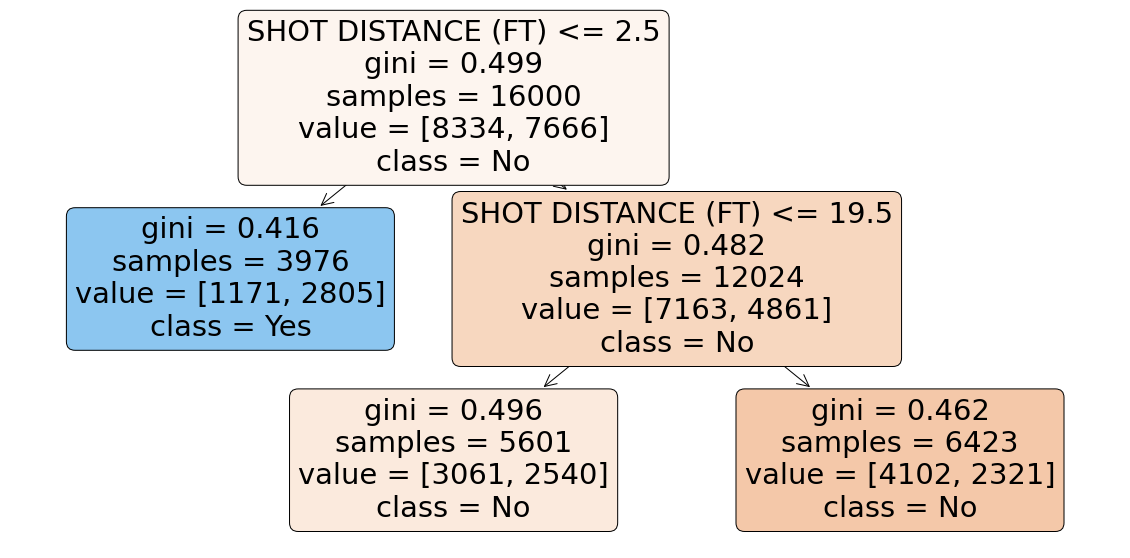

In [49]:
plt.figure(figsize=(20,10))
plot_tree(new_tree.best_estimator_, filled=True, rounded=True, feature_names=data.columns[1:], class_names=["No", "Yes"])
plt.show()

In [50]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, new_tree.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, new_tree.predict(X_test))))
print(classification_report(y_test, new_tree.predict(X_test)))

Ein: 0.3770
Eout: 0.3740
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      2135
           1       0.69      0.36      0.47      1865

    accuracy                           0.63      4000
   macro avg       0.65      0.61      0.59      4000
weighted avg       0.64      0.63      0.60      4000

